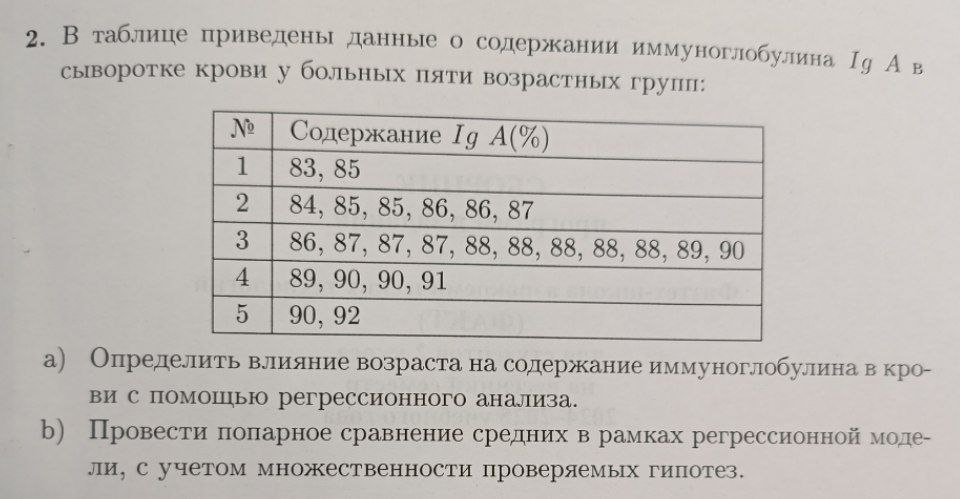

In [45]:
from IPython.display import Image

Image("images/task_2.jpg")

***a)***

In [46]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import f
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import ttest_ind

alpha = 0.05

# Создание индикаторных переменных
table = pd.DataFrame({
    'Age_Group': [1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5],
    'Ig_A': [83, 85, 84, 85, 85, 86, 86, 87, 86, 87, 87, 87, 88, 88, 88, 88, 88, 89, 90, 89, 90, 90, 91, 90, 92]})

base = 3
dummies = pd.get_dummies(table['Age_Group'], prefix='Age', dtype=int).drop(columns=[f'Age_{base}'])

for k in range(1, 6):
    if (k != base):
        model = sm.OLS(dummies[f'Age_{k}'], sm.add_constant(dummies.drop(f'Age_{k}', axis=1))).fit()
        print(f'R^2 для Age_{k}: {model.rsquared:.3f}')

print()
X = sm.add_constant(dummies)
model = sm.OLS(table['Ig_A'], X).fit()
print(model.params)

R^2 для Age_1: 0.080
R^2 для Age_2: 0.149
R^2 для Age_4: 0.127
R^2 для Age_5: 0.080

const    87.818182
Age_1    -3.818182
Age_2    -2.318182
Age_4     2.181818
Age_5     3.181818
dtype: float64


***b)***

In [47]:
groups = {
    1:  [83, 85],
    2:  [84, 85, 85, 86, 86, 87],
    3:  [86, 87, 87, 87, 88, 88, 88, 88, 89, 90],
    4:  [89, 90, 90, 91],
    5:  [90, 92]}

for i, group in enumerate(groups.values()):
    if(len(group) >= 4):
        p_val = lilliefors(group)[1]
        print(f"Group {i+1}: p-value = {p_val:.4f} =>", "Закон распределения значений не является нормальным" if p_val < alpha else "Нет основания отвергать гипотезу нормального распределения значений")

Group 2: p-value = 0.7687 => Нет основания отвергать гипотезу нормального распределения значений
Group 3: p-value = 0.1503 => Нет основания отвергать гипотезу нормального распределения значений
Group 4: p-value = 0.5559 => Нет основания отвергать гипотезу нормального распределения значений


In [48]:
for i in range(1, 6):
    for j in range(i+1, 6):
        n = len(groups[i])
        m = len(groups[j])
        Sx_2_1 = n / (n - 1) * np.std(groups[i]) ** 2
        Sy_2_2 = m / (m - 1) * np.std(groups[j]) ** 2
        delta = Sx_2_1 / Sy_2_2
        p_val = 1 - f.cdf(delta, n - 1, m - 1)
        print(f"Groups({i}, {j}):  p-value = {p_val:.4f} =>", "дисперсии равны" if (alpha / 2 < p_val < (1 - alpha / 2)) else "дисперсии не равны")

Groups(1, 2):  p-value = 0.2354 => дисперсии равны
Groups(1, 3):  p-value = 0.2443 => дисперсии равны
Groups(1, 4):  p-value = 0.1817 => дисперсии равны
Groups(1, 5):  p-value = 0.5000 => дисперсии равны
Groups(2, 3):  p-value = 0.5460 => дисперсии равны
Groups(2, 4):  p-value = 0.3609 => дисперсии равны
Groups(2, 5):  p-value = 0.7646 => дисперсии равны
Groups(3, 4):  p-value = 0.3192 => дисперсии равны
Groups(3, 5):  p-value = 0.7557 => дисперсии равны
Groups(4, 5):  p-value = 0.8183 => дисперсии равны


In [49]:
p_vals = {}
for i in range(1, 6):
    for j in range(i + 1, 6):
        p_val = ttest_ind(groups[i], groups[j])[1]
        if (p_val <= alpha):
            p_vals[(i, j)] = p_val
        print(f"Groups({i}, {j}):  p-value = {p_val:.4f} => средние", "равны" if (p_val > alpha) else "не равны")

print("\nПоправка Холма-Бонферрона к остальным парам:")
var_p_vals = dict(sorted(p_vals.items(), key=lambda item: item[1]))
m = len(var_p_vals)
for key, p_val in var_p_vals.items():
    if(p_val < alpha / m):
        m -= 1
    print(f"Groups{key}:  p-value = {p_val:.4f} => средние", "равны" if (p_val >= alpha) else "не равны")

Groups(1, 2):  p-value = 0.1515 => средние равны
Groups(1, 3):  p-value = 0.0018 => средние не равны
Groups(1, 4):  p-value = 0.0023 => средние не равны
Groups(1, 5):  p-value = 0.0385 => средние не равны
Groups(2, 3):  p-value = 0.0012 => средние не равны
Groups(2, 4):  p-value = 0.0001 => средние не равны
Groups(2, 5):  p-value = 0.0009 => средние не равны
Groups(3, 4):  p-value = 0.0044 => средние не равны
Groups(3, 5):  p-value = 0.0053 => средние не равны
Groups(4, 5):  p-value = 0.3125 => средние равны

Поправка Холма-Бонферрона к остальным парам:
Groups(2, 4):  p-value = 0.0001 => средние не равны
Groups(2, 5):  p-value = 0.0009 => средние не равны
Groups(2, 3):  p-value = 0.0012 => средние не равны
Groups(1, 3):  p-value = 0.0018 => средние не равны
Groups(1, 4):  p-value = 0.0023 => средние не равны
Groups(3, 4):  p-value = 0.0044 => средние не равны
Groups(3, 5):  p-value = 0.0053 => средние не равны
Groups(1, 5):  p-value = 0.0385 => средние не равны
